# Question 2

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 1           # Time step
t_max = 10000       # Total simulation time
n_steps = int(t_max / dt)
n_particles = 1000 # Number of particles (ensemble)
ksi = 1
g = 1
# Time array
t = np.linspace(0, t_max, n_steps)

# Arrays to store velocity and position
v = np.zeros((n_particles, n_steps))
x = np.zeros((n_particles, n_steps))

for i in range(1, n_steps):
    r = np.random.random(size=(n_particles,2))
    eta = np.sqrt(-2*np.log(r[:,0]))*np.cos(2*np.pi*r[:,1]) * 2* g
    v[:, i] = v[:, i-1] - ksi * v[:, i-1] * dt + eta * (dt)**(0.5)
    x[:, i] = x[:, i-1] + v[:, i] * dt

# Compute ensemble averages
v_mean = np.mean(v, axis=0)
v_squared_mean = np.mean(v**2, axis=0)
x_mean = np.mean(x, axis=0)
x_squared_mean = np.mean(x**2, axis=0)



# Part A, B, D, E

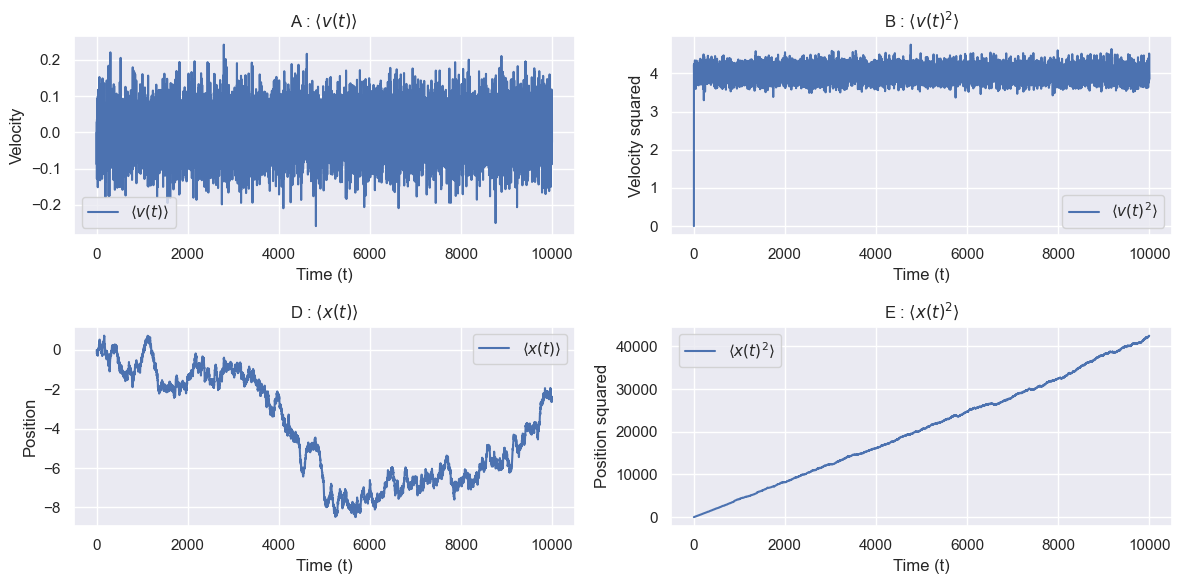

In [66]:
# Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t, v_mean, label=r"$\langle v(t) \rangle$")
plt.title(r"A : $\langle v(t) \rangle$")
plt.xlabel("Time (t)")
plt.ylabel("Velocity")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, v_squared_mean, label=r"$\langle v(t)^2 \rangle$")
plt.title(r"B : $\langle v(t)^2 \rangle$")
plt.xlabel("Time (t)")
plt.ylabel("Velocity squared")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, x_mean, label=r"$\langle x(t) \rangle$")
plt.title(r"D : $\langle x(t) \rangle$")
plt.xlabel("Time (t)")
plt.ylabel("Position")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, x_squared_mean, label=r"$\langle x(t)^2 \rangle$")
plt.title(r"E : $\langle x(t)^2 \rangle$")
plt.xlabel("Time (t)")
plt.ylabel("Position squared")
plt.legend()

plt.tight_layout()
plt.show()

# Part G

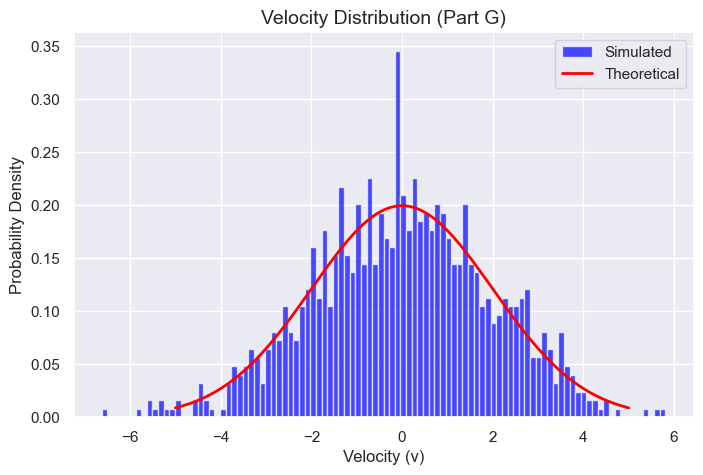

In [89]:

# Plot velocity distribution at the final time step (Part G)
plt.figure(figsize=(8, 5))

# Histogram of simulated velocities at the final time step
v_final = v[:, -1]  # Velocities at the last time step
plt.hist(v_final, bins=100, density=True, label="Simulated", alpha=0.7, color='blue')

# Analytical distribution for p(v)
v_theory = np.linspace(-5*np.sqrt(g/ksi), 5*np.sqrt(g/ksi), 200)  # Range for velocity
p_theory = np.exp(-ksi*v_theory**2 / (8*g)) / np.sqrt(8 * np.pi * g / ksi)  # Analytical p(v)
plt.plot(v_theory, p_theory, label="Theoretical", color='red', linewidth=2)

# Plot labels and legend
plt.xlabel("Velocity (v)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Velocity Distribution (Part G)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


# Part I

In [68]:
def pdf_2p(x, y, dx, dy, nx, ny, tau):
    """Compute the 2-point joint PDF for datasets x and y with bin widths dx and dy."""
    # Calculate the number of bins needed for x and y
    numx = int((x.max() - x.min()) / dx) + 1
    numy = int((y.max() - y.min()) / dy) + 1

    # Initialize a 2D array to store the joint PDF values
    pdf = np.zeros((numx, numy))

    # Shift x and y values to start from zero for binning
    x -= x.min()
    y -= y.min()

    # Loop over x and y values with time shifts to populate the joint PDF
    for i in range(len(x) - np.max((nx, ny)) * tau):
        j1 = int(x[i + (nx * tau)] / dx)
        j2 = int(y[i + (ny * tau)] / dy)
        pdf[j1, j2] += 1

    pdf = pdf / np.sum(pdf)
    # Normalize joint PDF by total count and bin areas to ensure it sums to 1
    return pdf

p_t1 = pdf_2p(v_mean, v_mean, 0.01, 0.01, 0, 1, tau=1)
p_t10 = pdf_2p(v_mean, v_mean, 0.01, 0.01, 0, 1, tau=10)
p_t100 = pdf_2p(v_mean, v_mean, 0.01, 0.01, 0, 1, tau=100)
p_t1000 = pdf_2p(v_mean, v_mean, 0.01, 0.01, 0, 1, tau=1000)
p_t5000 = pdf_2p(v_mean, v_mean, 0.01, 0.01, 0, 1, tau=5000)
p_tinf = pdf_2p(v_mean, v_mean, 0.01, 0.01, 0, 1, tau=9999)

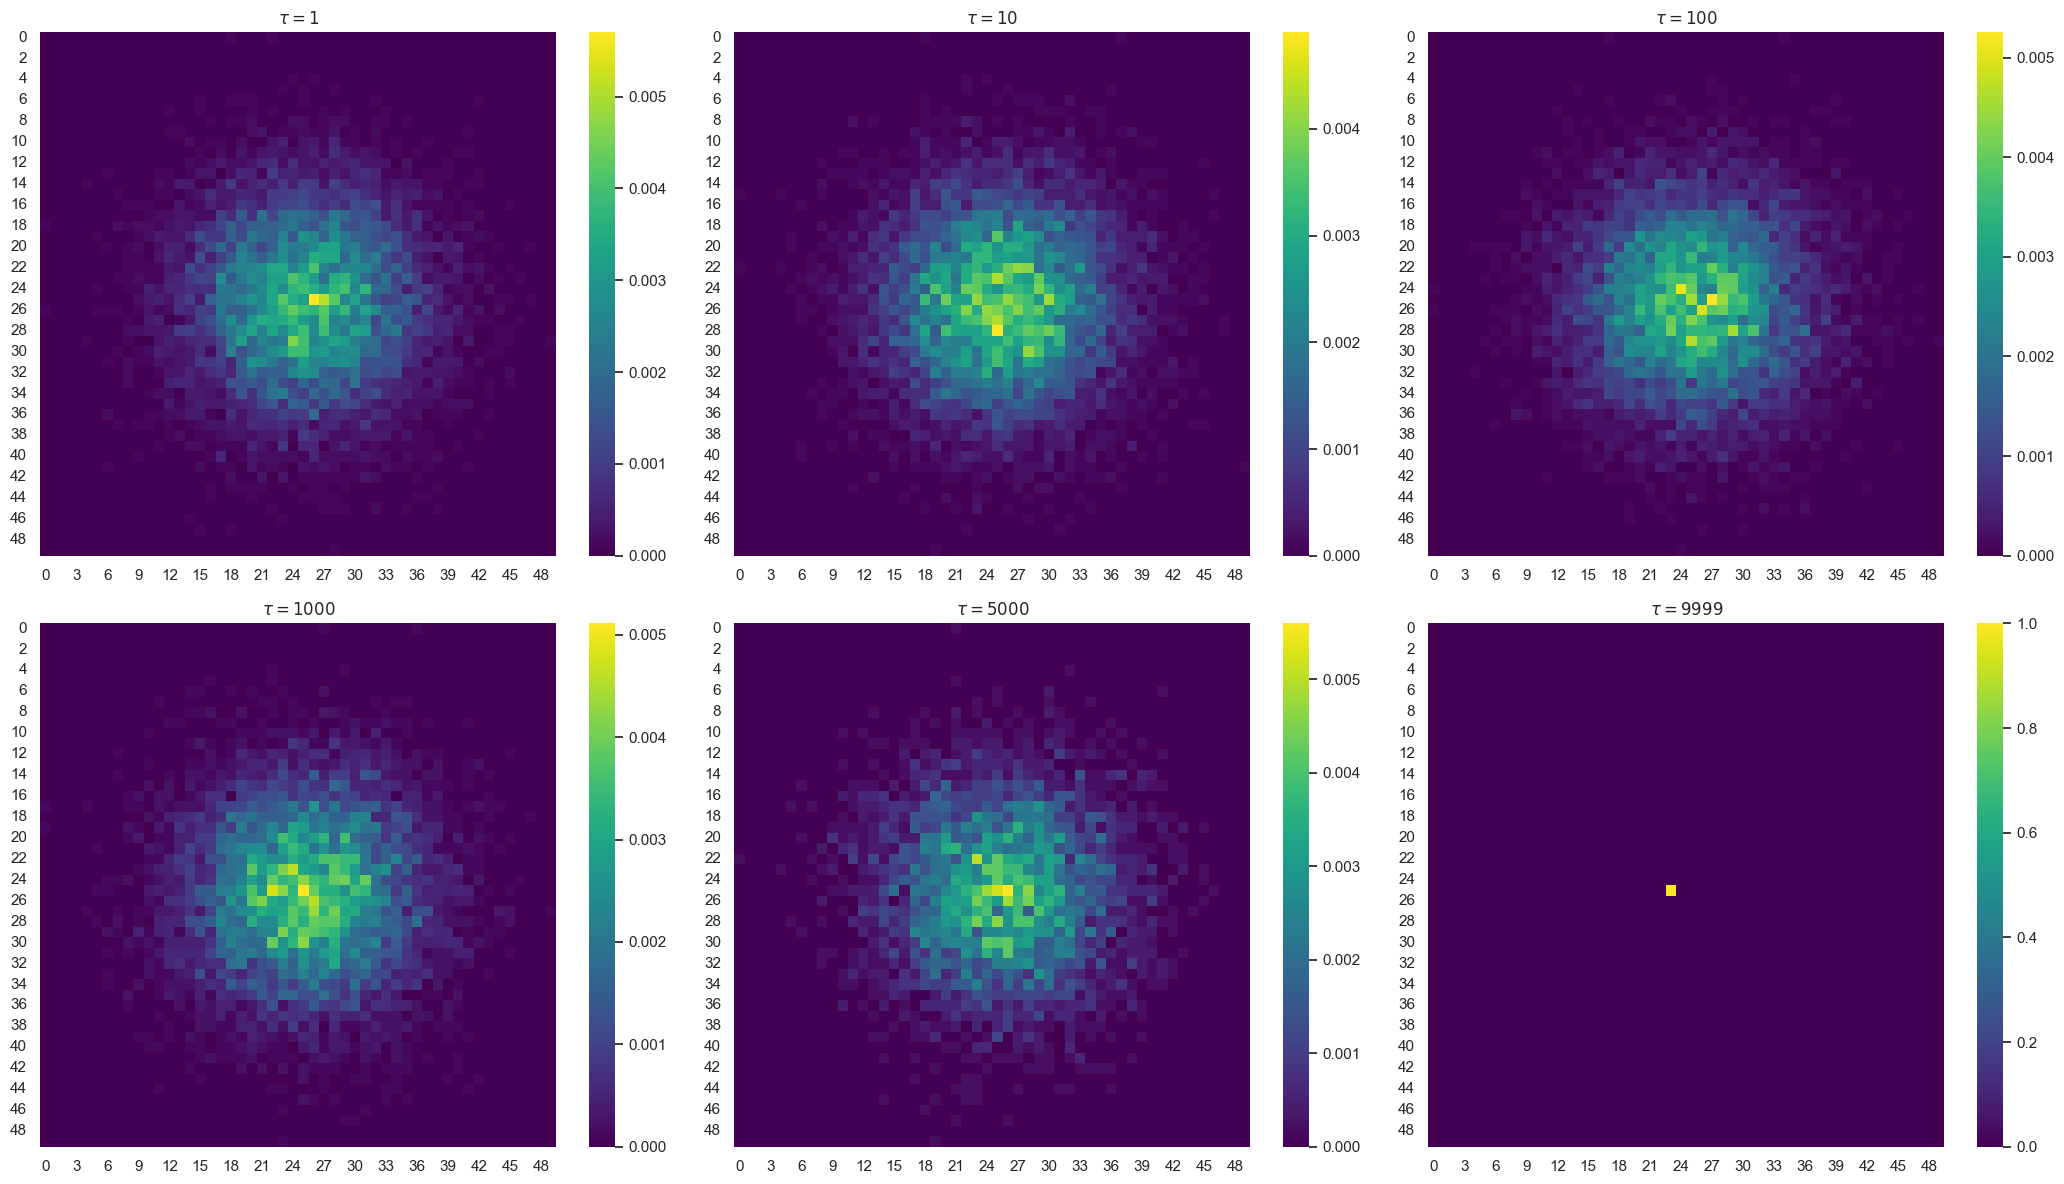

In [69]:
import seaborn as sns
sns.set()

fig, axes = plt.subplots(2, 3, figsize=(21,12))

sns.heatmap(p_t1, cmap="viridis", ax=axes[0,0])
axes[0,0].set_title(r"$\tau = 1$")

sns.heatmap(p_t10, cmap="viridis", ax=axes[0,1])
axes[0,1].set_title(r"$\tau = 10$")

sns.heatmap(p_t100, cmap="viridis", ax=axes[0,2])
axes[0,2].set_title(r"$\tau = 100$")

sns.heatmap(p_t1000, cmap="viridis", ax=axes[1,0])
axes[1,0].set_title(r"$\tau = 1000$")

sns.heatmap(p_t5000, cmap="viridis", ax=axes[1,1])
axes[1,1].set_title(r"$\tau = 5000$")

sns.heatmap(p_tinf, cmap="viridis", ax=axes[1,2])
axes[1,2].set_title(r"$\tau = 9999$")

plt.tight_layout()
plt.show()

# Part C & F
for this part we decrease the t_max(number of steps) to 1000 so the code takes less time to run

In [70]:

# Parameters
dt = 1           # Time step
t_max = 1000       # Total simulation time
n_steps = int(t_max / dt)
n_particles = 1000 # Number of particles (ensemble)
ksi = 1
g = 1
# Time array
t = np.linspace(0, t_max, n_steps)

# Arrays to store velocity and position
v = np.zeros((n_particles, n_steps))
x = np.zeros((n_particles, n_steps))


for i in range(1, n_steps):
    r = np.random.random(size=(n_particles,2))
    eta = np.sqrt(-2*np.log(r[:,0]))*np.cos(2*np.pi*r[:,1]) * 2* g
    v[:, i] = v[:, i-1] - ksi * v[:, i-1] * dt + eta * (dt)**(0.5)
    x[:, i] = x[:, i-1] + v[:, i] * dt

# Compute ensemble averages
v_mean = np.mean(v, axis=0)
v_squared_mean = np.mean(v**2, axis=0)
x_mean = np.mean(x, axis=0)
x_squared_mean = np.mean(x**2, axis=0)


In [71]:
vv_mean = np.zeros((n_steps,n_steps))
xx_mean = np.zeros((n_steps,n_steps))
for tau in range(n_steps):
    for t in range(n_steps-tau):
        vv = np.mean(v[:,t]*v[:,t+tau], axis=0)
        xx = np.mean(x[:,t]*x[:,t+tau], axis=0)
        vv_mean[tau,t] = vv
        xx_mean[tau,t] = xx


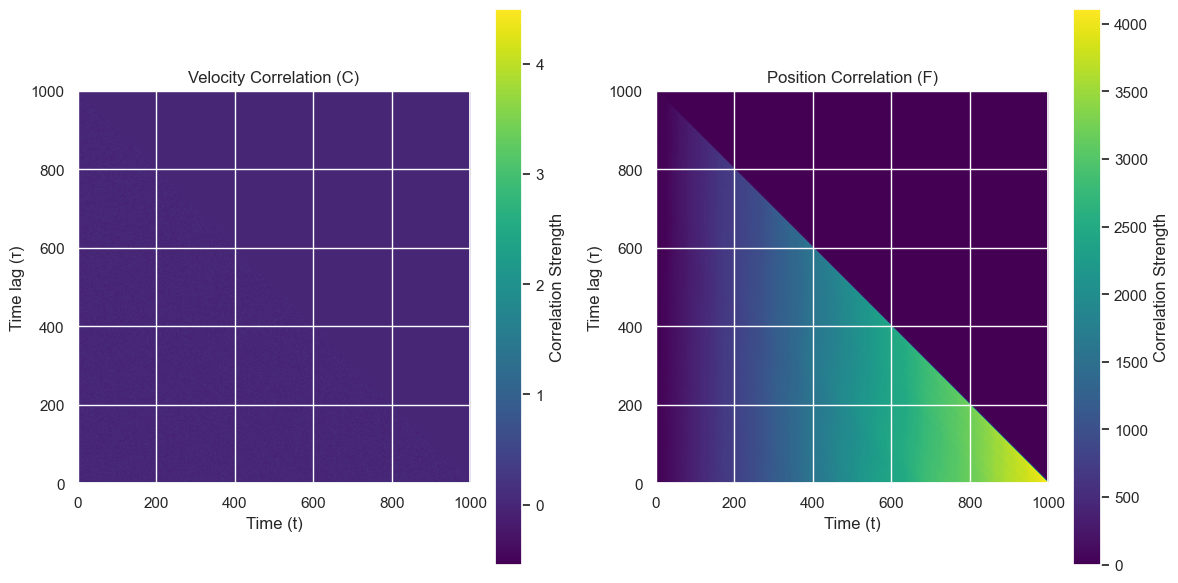

In [72]:
plt.figure(figsize=(12, 6))

# First subplot: Velocity Correlation
plt.subplot(1, 2, 1)
im1 = plt.imshow(vv_mean, cmap="viridis", origin="lower", 
                 extent=[0, vv_mean.shape[1], 0, vv_mean.shape[0]])  # To ensure the plot starts at [0,0] in the bottom-left corner
cb1 = plt.colorbar(im1)
cb1.set_label("Correlation Strength")
plt.title("Velocity Correlation (C)")
plt.xlabel("Time (t)")
plt.ylabel("Time lag (τ)")

# Second subplot: Position Correlation
plt.subplot(1, 2, 2)
im2 = plt.imshow(xx_mean, cmap="viridis", origin="lower", 
                 extent=[0, xx_mean.shape[1], 0, xx_mean.shape[0]])  # To ensure the plot starts at [0,0] in the bottom-left corner
cb2 = plt.colorbar(im2)
cb2.set_label("Correlation Strength")
plt.title("Position Correlation (F)")
plt.xlabel("Time (t)")
plt.ylabel("Time lag (τ)")

# Adjust layout and display
plt.tight_layout()
plt.show()
